In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
# df_test =df['volatile acidity','citric acid']
df_grp= df.groupby(['quality',])
df_grp

In [5]:
from scipy import stats
coef,p_val = stats.pearsonr(df['volatile acidity'],df['citric acid'])
coef, p_val

(-0.5524956845595808, 1.80566341434038e-128)

In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# Missing value check
missing = pd.DataFrame(df.isnull().sum(),columns = ['No.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,No.of missing values,% missing_values
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


# Visualizing

<AxesSubplot:xlabel='quality', ylabel='count'>

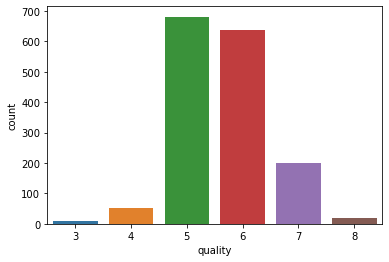

In [13]:
sns.countplot(x = 'quality', data = df)

In [14]:
df1 = df.select_dtypes([np.int64, np.float])
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


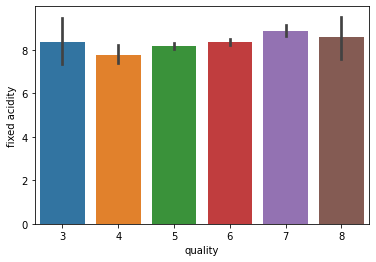

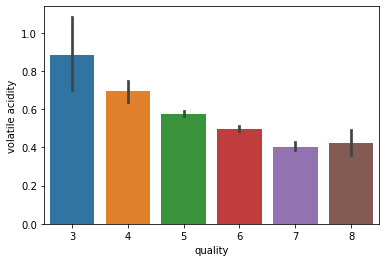

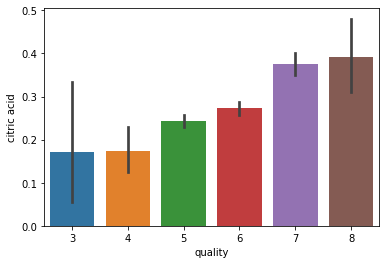

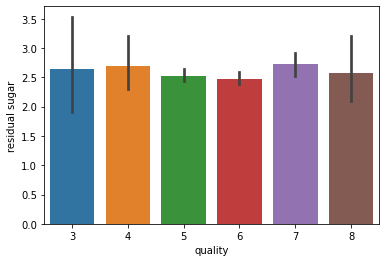

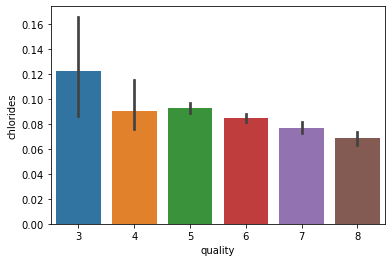

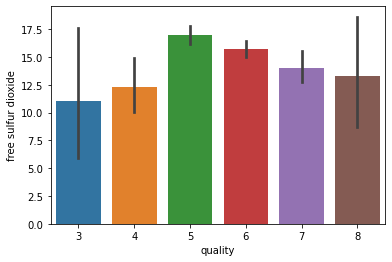

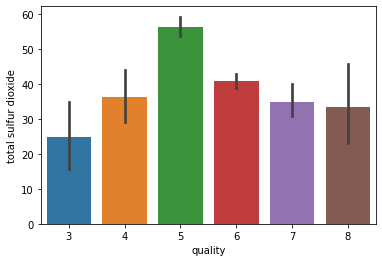

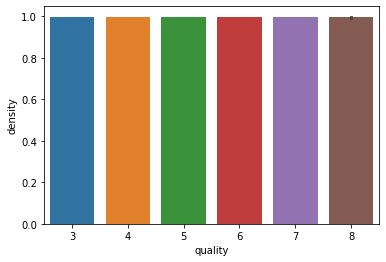

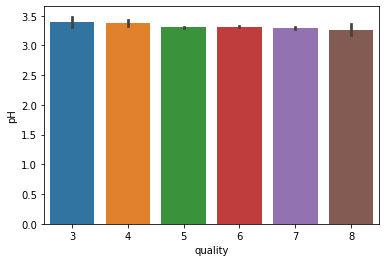

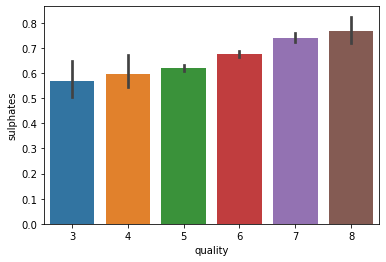

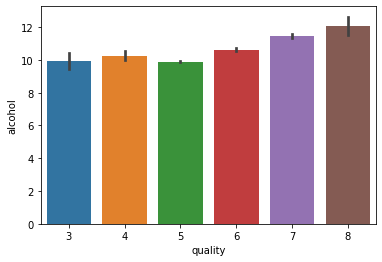

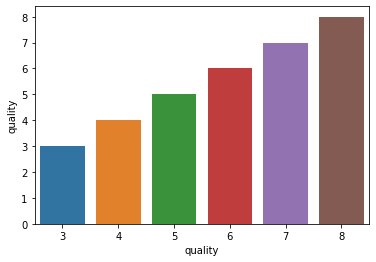

In [15]:
for i,col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x ='quality', y = col, data=df1)

<AxesSubplot:>

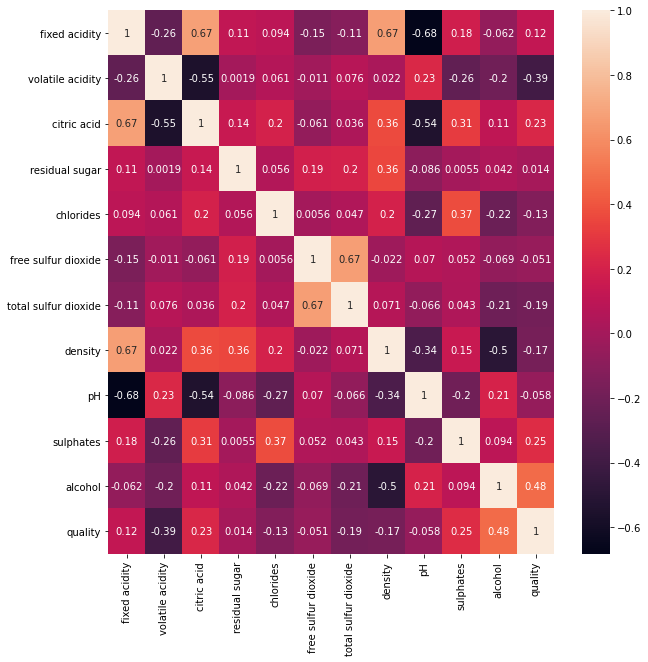

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), color = "k", annot=True)

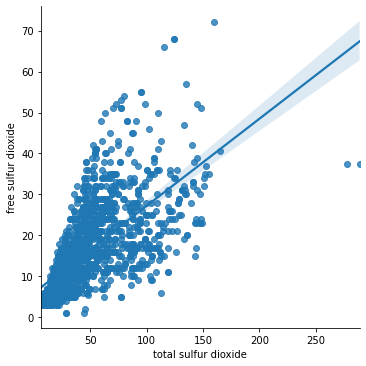

In [17]:
sns.lmplot(x = "total sulfur dioxide", y ="free sulfur dioxide", data=df)

# Creating Arbitrary classification bins - Binning
- Binning will take a column with countinuous data and places the numbers in "bins" based on ranges that we determine. This will give us a new categorical variable feature

In [5]:
bins = (2,6.5,8)
labels = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [6]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [7]:
df['quality'] = df['quality'].apply(lambda x: 1 if x is 'good' else 0)

In [8]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Seperating dependent and independet variables

In [9]:
X = df.drop('quality', axis = 1)
y = df.quality

# train-test-split

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [36]:
# checking if central tendency of test and train samples are statistically

In [34]:
X_train['residual sugar'].describe()

count    1119.000000
mean        2.548302
std         1.427730
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [35]:
X_test['residual sugar'].describe()

count    480.000000
mean       2.516667
std        1.368736
min        1.200000
25%        1.900000
50%        2.200000
75%        2.600000
max       15.400000
Name: residual sugar, dtype: float64

In [37]:
X['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

# Feature Scaling

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Traing onto multiple models

In [40]:
def models(X_train, Y_train):
    
    #Logistic Regression
    log_regression = LogisticRegression(penalty='l2', C=28, random_state=28)
    log_regression.fit(X_train,y_train)
    
    #SVM
    svm_sigmoid = SVC(C=28, kernel='sigmoid',degree=5,gamma='auto')
    svm_sigmoid.fit(X_train,y_train)
    
    #SVM
    svm_rbf = SVC(C=28, kernel='rbf',degree=5,gamma='auto')
    svm_rbf.fit(X_train,y_train)
    
    #SVM
    svm_linear = SVC(C=28, kernel='linear',degree=5,gamma='auto')
    svm_linear.fit(X_train,y_train)
    
    #SVM
    svm_poly = SVC(C=28, kernel='poly',degree=5,gamma='auto')
    svm_poly.fit(X_train,y_train)
    
    #KNN
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train)
    
    #GuassianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Decision Tree
    dt = DecisionTreeClassifier(max_depth=7, criterion='gini',min_samples_split=15, min_samples_leaf=9)
    dt.fit(X_train, y_train)
    
    #Random Forest
    rf = RandomForestClassifier(max_depth=7, criterion='gini',min_samples_split=15, min_samples_leaf=9, n_estimators=401,
                                max_features='auto', bootstrap=True, random_state=28)
    rf.fit(X_train, y_train)
    
    print("1. Logistic Regression Training accuracy", log_regression.score(X_train,y_train))
    print("2. SVM Training accuracy kernal = sigmoid", svm_sigmoid.score(X_train,y_train))
    print("3. SVM Training accuracy kernal = rbf", svm_rbf.score(X_train,y_train))
    print("4. SVM Training accuracy kernal = linear", svm_linear.score(X_train,y_train))
    print("5. SVM Training accuracy kernal = poly", svm_poly.score(X_train,y_train))
    print("6. KNN Training accuracy", knn.score(X_train,y_train))
    print("7. GuassianNB Training accuracy", gauss.score(X_train,y_train))
    print("8. DT Training accuracy", dt.score(X_train,y_train))
    print("9. RF Training accuracy", rf.score(X_train,y_train))
    
    return log_regression, svm_sigmoid,svm_rbf, svm_linear, svm_poly, knn, gauss, dt, rf

In [41]:
# Evaluating Performance
model = models(X_train,y_train)

1. Logistic Regression Training accuracy 0.8900804289544236
2. SVM Training accuracy kernal = sigmoid 0.8123324396782842
3. SVM Training accuracy kernal = rbf 0.9705093833780161
4. SVM Training accuracy kernal = linear 0.8659517426273459
5. SVM Training accuracy kernal = poly 0.9633601429848079
6. KNN Training accuracy 0.8954423592493298
7. GuassianNB Training accuracy 0.8471849865951743
8. DT Training accuracy 0.9285075960679178
9. RF Training accuracy 0.9204647006255585


In [42]:
for i in range(len(model)):
    cm = confusion_matrix(y_test,model[i].predict(X_test))
    TN,FP,FN,TP = confusion_matrix(y_test,model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuuracy = {}'.format(i, (TP+TN)/(TP+TN+FP+FN)))
    print()

[[395  18]
 [ 46  21]]
Model[0] Testing Accuuracy = 0.8666666666666667

[[367  46]
 [ 48  19]]
Model[1] Testing Accuuracy = 0.8041666666666667

[[386  27]
 [ 30  37]]
Model[2] Testing Accuuracy = 0.88125

[[413   0]
 [ 67   0]]
Model[3] Testing Accuuracy = 0.8604166666666667

[[383  30]
 [ 31  36]]
Model[4] Testing Accuuracy = 0.8729166666666667

[[390  23]
 [ 37  30]]
Model[5] Testing Accuuracy = 0.875

[[354  59]
 [ 20  47]]
Model[6] Testing Accuuracy = 0.8354166666666667

[[391  22]
 [ 39  28]]
Model[7] Testing Accuuracy = 0.8729166666666667

[[401  12]
 [ 50  17]]
Model[8] Testing Accuuracy = 0.8708333333333333



In [43]:
svm = SVC()
params = {'C': range(2,100),
    'kernel': ['rbf','sigmoid','poly'],
    'degree': range(15),
    'gamma':['scale', 'auto']}

In [17]:
grid = GridSearchCV(svm, params, scoring='accuracy', cv=10, n_jobs=-1)

In [225]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(2, 100), 'degree': range(0, 15),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [44]:
svm.set_params(C = 17, degree = 0, gamma=  'scale', kernel= 'rbf')
svm.fit(X_train,y_train)

SVC(C=17, degree=0)

In [45]:
svm.score(X_train,y_train)

0.9633601429848079

In [29]:
# grid.best_score_, grid.best_params_

In [46]:
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [47]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8770833333333333
[[388  34]
 [ 25  33]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       422
           1       0.49      0.57      0.53        58

    accuracy                           0.88       480
   macro avg       0.72      0.74      0.73       480
weighted avg       0.89      0.88      0.88       480



In [23]:
# Here prediction of 0 is good but prection of 1 is very low so let's go with Random Forest.

In [48]:
y_pred = list(svm.predict(X_test))
df_new = {'predicted':y_pred,'original':y_test}
df_new = pd.DataFrame(df_new)
df_new

,predicted,original
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0
...,...,...
1468,0,1
495,0,1
1325,0,0
514,0,1


# Ranfdom Forest

In [49]:
RF = RandomForestClassifier()

In [27]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(30),
              'min_samples_split':range(20),
              'min_samples_leaf': range(20)
             }

cv_rf = GridSearchCV(RF, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = -1, scoring = 'accuracy')

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3}
Time taken in grid search:  7667.82


In [28]:
cv_rf.best_params_, cv_rf.best_score_
# ({'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3},
#  0.9085445374015748)

({'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3},
 0.9085445374015748)

In [50]:
RF = RandomForestClassifier(random_state=28)
RF.set_params(
    criterion='gini',
    max_depth=20,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True
)

RandomForestClassifier(max_depth=20, min_samples_split=3, random_state=28)

# OOB score

In [51]:
# Cleaning test sets to avoid future warning messages
y_train = y_train.values.ravel() 
y_test = y_test.values.ravel()

In [36]:
RF.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 600
max_estimators = 2000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    RF.set_params(n_estimators=i)
    RF.fit(X_train, y_train)

    oob_error = 1 - RF.oob_score_
    error_rate[i] = oob_error

In [39]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

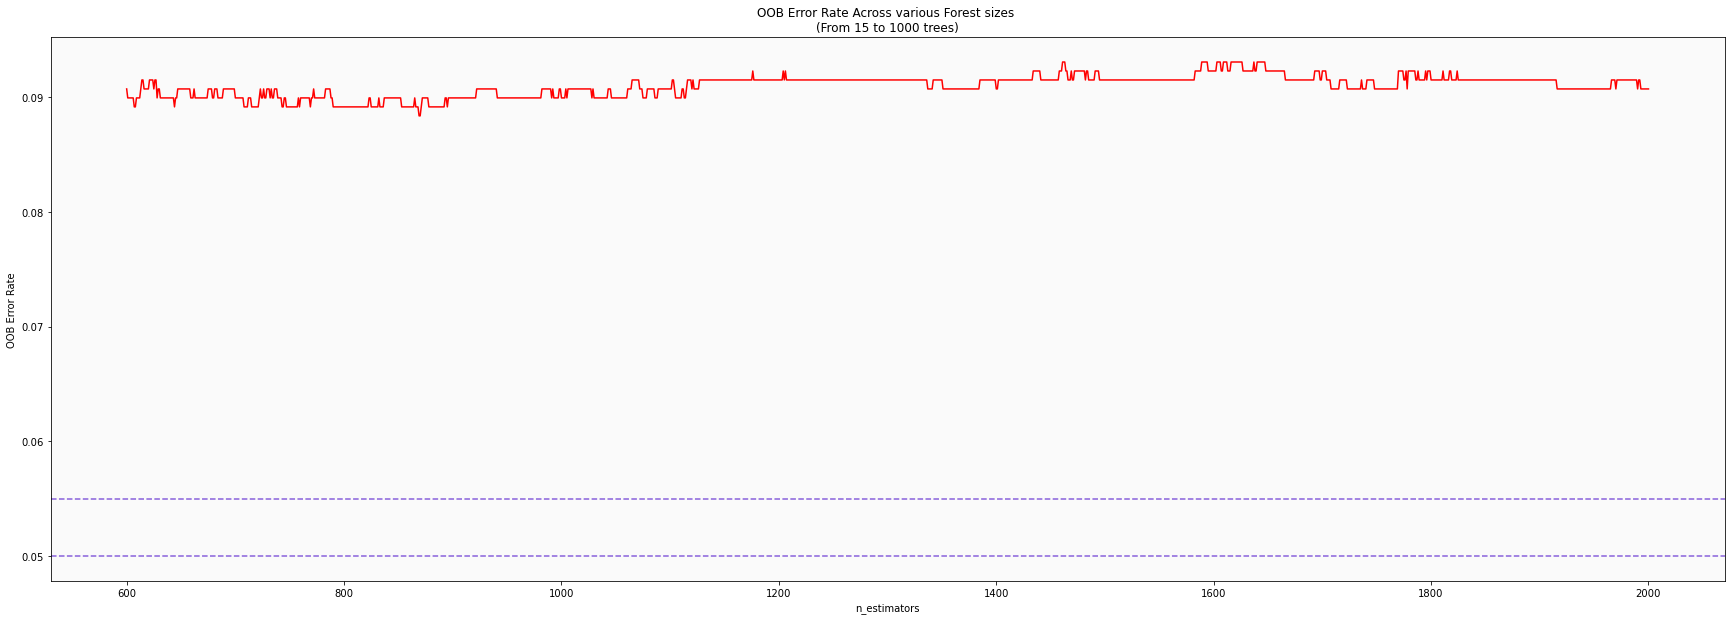

In [40]:
fig, ax = plt.subplots(figsize=(30,10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [41]:
# n_estimators = 1180
print('OOB Error rate for 1179 trees is: {0:.5f}'.format(oob_series[1179]))

OOB Error rate for 1179 trees is: 0.09148


In [52]:
# Refine the tree via OOB Output
# RF = RandomForestClassifier(random_state=28)
RF.set_params(
    n_estimators=1179,
    bootstrap = True,
    warm_start=False, 
    oob_score=False
)

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=1179,
                       random_state=28)

# Train the RandomForest

In [53]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=1179,
                       random_state=28)

# Variable Importance

In [57]:
import pandas as pd
feature_importances=pd.DataFrame(RF.feature_importances_,
                                 index=X.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
alcohol,0.183353
sulphates,0.122054
volatile acidity,0.115377
density,0.096024
citric acid,0.083751
total sulfur dioxide,0.078095
chlorides,0.072956
fixed acidity,0.067023
residual sugar,0.062397
pH,0.059660


# Predictions

In [58]:
y_pred = RF.predict(X_test)

# Confusion Matrix

In [59]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

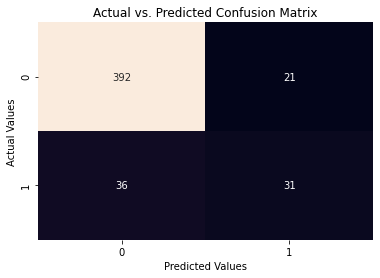

In [60]:
conf_mat = create_conf_mat(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [61]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.88125
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       428
           1       0.46      0.60      0.52        52

    accuracy                           0.88       480
   macro avg       0.71      0.76      0.73       480
weighted avg       0.90      0.88      0.89       480



In [62]:
RF.score(X_train, y_train)

1.0

In [63]:
RF.score(X_test, y_test)

0.88125

# Saving the Model

In [64]:
import joblib

In [65]:
filename = 'finalised.model.sav'
joblib.dump(RF,filename)

['finalised.model.sav']

# Load the model

In [66]:
loaded_model = joblib.load(filename)

In [67]:
loaded_model

RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=1179,
                       random_state=28)